In [104]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn import metrics
plt.rc("font", size=14)
from pandas.io.formats.style import Styler
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [86]:

# Loading the train and test data sets

import numpy as np
import pandas as pd 

train_data=pd.read_csv('../input/TrainData.csv',sep=';', engine='python')
train_data.head()

,Stammnummer,Zielvariable,Tag,Monat,Dauer,Anruf-ID,Alter,Geschlecht,Art der Anstellung,Familienstand,Schulabschlu�,Ausfall Kredit,Kontostand,Haus,Kredit,Kontaktart,Anzahl der Ansprachen,Tage seit letzter Kampagne,Anzahl Kontakte letzte Kampagne,Ergebnis letzte Kampagne
0,432148809,nein,27,may,166,623,30,w,Arbeiter,verheiratet,Abitur,nein,-202,nein,nein,Unbekannt,2,NaN,0,Unbekannt
1,432184318,nein,26,oct,183,1992,42,w,Management,verheiratet,Studium,nein,2463,nein,nein,Handy,2,NaN,0,Unbekannt
2,432182482,nein,5,jun,227,2778,26,w,Dienstleistung,single,Abitur,nein,2158,ja,ja,Festnetz,1,NaN,0,Unbekannt
3,432150520,nein,2,jun,31,3070,34,m,Arbeitslos,geschieden,Studium,ja,75,ja,nein,Unbekannt,3,NaN,0,Unbekannt
4,432145870,nein,15,may,1231,6583,48,m,Arbeiter,verheiratet,Real-/Hauptschule,nein,559,ja,nein,Unbekannt,2,NaN,0,Unbekannt


Getting some information from train dataset.

In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
Stammnummer                        31480 non-null int64
Zielvariable                       31480 non-null object
Tag                                31480 non-null int64
Monat                              31480 non-null object
Dauer                              31480 non-null int64
Anruf-ID                           31480 non-null int64
Alter                              31480 non-null int64
Geschlecht                         31480 non-null object
Art der Anstellung                 31480 non-null object
Familienstand                      31480 non-null object
Schulabschlu�                      31480 non-null object
Ausfall Kredit                     31480 non-null object
Kontostand                         31480 non-null int64
Haus                               31480 non-null object
Kredit                             31480 non-null object
Kontaktart                         31480 n

Loading the test dataset.

In [87]:
test_data=pd.read_csv('../input/TestData.csv', sep=';', engine='python')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Data columns (total 20 columns):
Stammnummer                        13731 non-null int64
Zielvariable                       0 non-null float64
Tag                                13731 non-null int64
Monat                              13731 non-null object
Dauer                              13731 non-null int64
Anruf-ID                           13731 non-null int64
Alter                              13731 non-null int64
Geschlecht                         13731 non-null object
Art der Anstellung                 13731 non-null object
Familienstand                      13731 non-null object
Schulabschlu�                      13731 non-null object
Ausfall Kredit                     13731 non-null object
Kontostand                         13731 non-null int64
Haus                               13731 non-null object
Kredit                             13731 non-null object
Kontaktart                         13731 non-

replacing white spaces with underline in  columns header.

In [88]:
train_data.columns = train_data.columns.str.replace(' ', '_')
test_data.columns = test_data.columns.str.replace(' ', '_')
train_data.rename(columns={ 'Schulabschlu�' : 'Schulabschluss'}, inplace=True)
test_data.rename(columns={ 'Schulabschlu�' : 'Schulabschluss'}, inplace=True)
train_data.columns

Index(['Stammnummer', 'Zielvariable', 'Tag', 'Monat', 'Dauer', 'Anruf-ID',
       'Alter', 'Geschlecht', 'Art_der_Anstellung', 'Familienstand',
       'Schulabschluss', 'Ausfall_Kredit', 'Kontostand', 'Haus', 'Kredit',
       'Kontaktart', 'Anzahl_der_Ansprachen', 'Tage_seit_letzter_Kampagne',
       'Anzahl_Kontakte_letzte_Kampagne', 'Ergebnis_letzte_Kampagne'],
      dtype='object')

Extracting sub dataset including object variables (categorical data) ->

In [81]:
obj_data = train_data.select_dtypes(include=['object']).copy()
obj_col=obj_data.columns
for col in obj_col:
    print(obj_data.groupby([col]).size())

Zielvariable
ja       3700
nein    27780
dtype: int64
Monat
apr    2040
aug    4334
dec     150
feb    1887
jan     958
jul    4783
jun    3760
mar     348
may    9514
nov    2781
oct     515
sep     410
dtype: int64
Geschlecht
m    15770
w    15710
dtype: int64
Art_der_Anstellung
Arbeiter             6781
Arbeitslos            921
Dienstleistung       2872
Gr�nder              1029
Hausfrau              854
Management           6502
Rentner              1616
Selbst�ndig          1112
Student               645
Technischer Beruf    5334
Unbekannt             212
Verwaltung           3602
dtype: int64
Familienstand
geschieden      3557
single          8921
verheiratet    19002
dtype: int64
Schulabschluss
Abitur               16188
Real-/Hauptschule     4741
Studium               9251
Unbekannt             1300
dtype: int64
Ausfall_Kredit
ja        555
nein    30925
dtype: int64
Haus
ja      17503
nein    13977
dtype: int64
Kredit
ja       5003
nein    26477
dtype: int64
Kontaktart
Festne

In [89]:
def change_string(x):
    return x.replace('Gr�nder',"Greunder").replace('Selbst�ndig','Selbsteandig')
train_data['Art_der_Anstellung'] = train_data['Art_der_Anstellung'].map(lambda x: change_string(x))
test_data['Art_der_Anstellung'] = test_data['Art_der_Anstellung'].map(lambda x: change_string(x))
test_data.groupby('Art_der_Anstellung').size()

Art_der_Anstellung
Arbeiter             2951
Arbeitslos            382
Dienstleistung       1282
Greunder              458
Hausfrau              386
Management           2956
Rentner               648
Selbsteandig          467
Student               293
Technischer Beruf    2263
Unbekannt              76
Verwaltung           1569
dtype: int64

## Data Preprocessing and Visualization

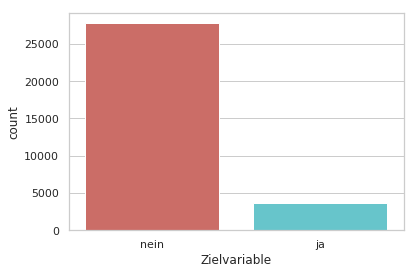

In [27]:
sns.countplot(x='Zielvariable',data=train_data,palette='hls')
plt.show()

This plot shows that the classes are imbalanced.

<Figure size 720x720 with 0 Axes>

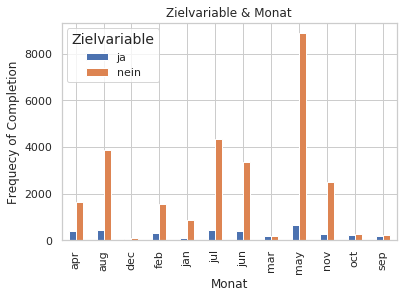

In [33]:
fig = plt.figure(figsize=(10,10))

pd.crosstab(train_data.Monat,train_data.Zielvariable).plot(kind='bar')
plt.title('Zielvariable & Monat')
plt.xlabel('Monat')
plt.ylabel('Frequecy of Completion')
# plt.savefig('frequency_based_Monat')
plt.show()

Seems that Monat would be a good feature for prediction while during the summer we have more no result.

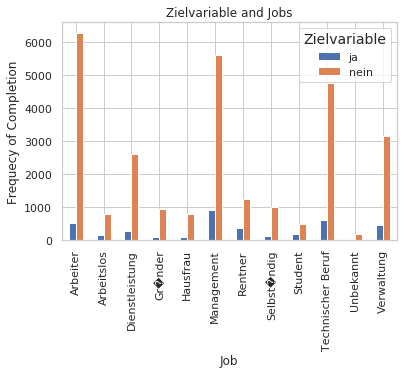

In [34]:
pd.crosstab(train_data.Art_der_Anstellung,train_data.Zielvariable).plot(kind='bar')
plt.title('Zielvariable and Jobs')
plt.xlabel('Job')
plt.ylabel('Frequecy of Completion')
plt.show()

In [54]:
# pd.crosstab(train_data.Kredit,train_data.Zielvariable).plot(kind='bar',ax=axes[1,0])
# pd.crosstab(train_data.Haus,train_data.Zielvariable).plot(kind='bar',ax=axes[1,1])

### Missing values
To display the places of missing values. It shows that the main missing vaues are in (Tage seit letzter kampagne).

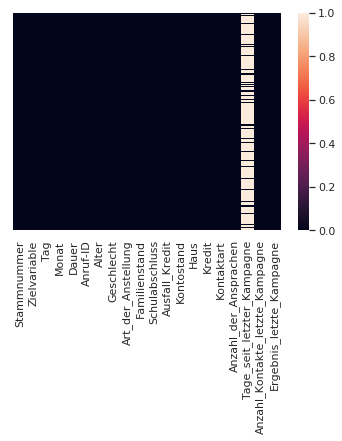

In [55]:
sns.heatmap(train_data.isnull(),yticklabels=False)
plt.show()

Looking at the data, it seems that where we have a NaN in [Tage...] the value in [Anzahl...] is 0 else we have non-zero variable.
Meanwhile, instead of droping this column [Tage...] I will fill the missing values by 0.

In [91]:
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)

I change the continuse variables to categorical. For Kontostand I have 3 (negative, positive and 0). And for [Tage...] I have 0 and positive : 1 .

In [92]:
train_data['Kontostand'] = ['Negative' if x < 0 else 'Null' if x == 0 else 'positive' if x > 0 else 'NaN' for x in train_data['Kontostand']]
train_data['Tage_seit_letzter_Kampagne'] = [1 if x > 0 else 0 for x in train_data['Tage_seit_letzter_Kampagne']]

test_data['Kontostand'] = ['Negative' if x < 0 else 'Null' if x == 0 else 'positive' if x > 0 else 'NaN' for x in test_data['Kontostand']]
test_data['Tage_seit_letzter_Kampagne'] = [1 if x > 0 else 0 for x in test_data['Tage_seit_letzter_Kampagne']]

In [93]:
cleanup_nums = {'Zielvariable':{'nein':0,'ja':1}}
train_data.replace(cleanup_nums, inplace=True)

In [95]:

cat_vars=['Kontostand','Geschlecht','Familienstand','Haus','Kredit','Ausfall_Kredit','Kontaktart',
          'Schulabschluss', 'Ergebnis_letzte_Kampagne','Art_der_Anstellung','Monat']
for var in cat_vars:
    cat_list_train='var'+'_'+ var
    cat_list_train = pd.get_dummies(train_data[var], prefix=var)
    cat_list_test= 'var' + '_' + var
    cat_list_test = pd.get_dummies(test_data[var], prefix=var)
    data1=train_data.join(cat_list_train)
    data2=test_data.join(cat_list_test)
    train_data=data1
    test_data=data2

data_vars_train=train_data.columns.values.tolist()
data_vars_test=test_data.columns.values.tolist()
to_keep_train=[i for i in data_vars_train if i not in cat_vars]
Train_dt=train_data[to_keep_train]
to_keep_test=[i for i in data_vars_test if i not in cat_vars]
Test_dt=test_data[to_keep_test]
print(Train_dt.columns)
print(Test_dt.columns)

Index(['Stammnummer', 'Zielvariable', 'Tag', 'Dauer', 'Anruf-ID', 'Alter',
       'Anzahl_der_Ansprachen', 'Tage_seit_letzter_Kampagne',
       'Anzahl_Kontakte_letzte_Kampagne', 'Kontostand_Negative',
       'Kontostand_Null', 'Kontostand_positive', 'Geschlecht_m',
       'Geschlecht_w', 'Familienstand_geschieden', 'Familienstand_single',
       'Familienstand_verheiratet', 'Haus_ja', 'Haus_nein', 'Kredit_ja',
       'Kredit_nein', 'Ausfall_Kredit_ja', 'Ausfall_Kredit_nein',
       'Kontaktart_Festnetz', 'Kontaktart_Handy', 'Kontaktart_Unbekannt',
       'Schulabschluss_Abitur', 'Schulabschluss_Real-/Hauptschule',
       'Schulabschluss_Studium', 'Schulabschluss_Unbekannt',
       'Ergebnis_letzte_Kampagne_Erfolg',
       'Ergebnis_letzte_Kampagne_Kein Erfolg',
       'Ergebnis_letzte_Kampagne_Sonstiges',
       'Ergebnis_letzte_Kampagne_Unbekannt', 'Art_der_Anstellung_Arbeiter',
       'Art_der_Anstellung_Arbeitslos', 'Art_der_Anstellung_Dienstleistung',
       'Art_der_Anstellung_Gr

In [96]:
# droping the unuseful columns in modeling.
Train_dt=Train_dt.drop(['Tag','Stammnummer','Anruf-ID'],axis=1)
Test_dt=Test_dt.drop(['Tag','Stammnummer','Anruf-ID','Zielvariable'],axis=1)

In [97]:
import warnings
warnings.filterwarnings("ignore")

#Data Normalization
scaler=preprocessing.StandardScaler()
Train_dt['normAlter'] = scaler.fit_transform(Train_dt[['Alter']])
Train_dt['normDauer'] = scaler.fit_transform(Train_dt[['Dauer']])
Test_dt['normAlter'] = scaler.fit_transform(Test_dt[['Alter']])
Test_dt['normDauer'] = scaler.fit_transform(Test_dt[['Dauer']])
Test_dt=Test_dt.drop(['Alter','Dauer'], axis=1)
Tain_dt = Train_dt.drop(['Alter','Dauer'], axis=1)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [99]:
# For better convergance let us change float data type to int64.
def change_type(Train_dt):
    float_list = list(Train_dt.select_dtypes(include=["float64"]).columns)
#     print(float_list)
    for col in float_list:
        Train_dt[col] = Train_dt[col].astype(np.int64)


change_type(Train_dt)
change_type(Test_dt)
Train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 57 columns):
Zielvariable                            31480 non-null int64
Dauer                                   31480 non-null int64
Alter                                   31480 non-null int64
Anzahl_der_Ansprachen                   31480 non-null int64
Tage_seit_letzter_Kampagne              31480 non-null int64
Anzahl_Kontakte_letzte_Kampagne         31480 non-null int64
Kontostand_Negative                     31480 non-null uint8
Kontostand_Null                         31480 non-null uint8
Kontostand_positive                     31480 non-null uint8
Geschlecht_m                            31480 non-null uint8
Geschlecht_w                            31480 non-null uint8
Familienstand_geschieden                31480 non-null uint8
Familienstand_single                    31480 non-null uint8
Familienstand_verheiratet               31480 non-null uint8
Haus_ja                              

# Data Balancing

To do the oversampling I use the SMOTE method.

In [102]:
features_name=['Anzahl_der_Ansprachen',
       'Tage_seit_letzter_Kampagne', 'Anzahl_Kontakte_letzte_Kampagne',
       'Kontostand_Negative', 'Kontostand_Null', 'Kontostand_positive',
       'Geschlecht_m', 'Geschlecht_w', 'Familienstand_geschieden',
       'Familienstand_single', 'Familienstand_verheiratet', 'Haus_ja',
       'Haus_nein', 'Kredit_ja', 'Kredit_nein', 'Ausfall_Kredit_ja',
       'Ausfall_Kredit_nein', 'Kontaktart_Festnetz', 'Kontaktart_Handy',
       'Kontaktart_Unbekannt', 'Schulabschluss_Abitur',
       'Schulabschluss_Real-/Hauptschule', 'Schulabschluss_Studium',
       'Schulabschluss_Unbekannt', 'Ergebnis_letzte_Kampagne_Erfolg',
       'Ergebnis_letzte_Kampagne_Kein Erfolg',
       'Ergebnis_letzte_Kampagne_Sonstiges',
       'Ergebnis_letzte_Kampagne_Unbekannt', 'Art_der_Anstellung_Arbeiter',
       'Art_der_Anstellung_Arbeitslos', 'Art_der_Anstellung_Dienstleistung',
       'Art_der_Anstellung_Greunder', 'Art_der_Anstellung_Hausfrau',
       'Art_der_Anstellung_Management', 'Art_der_Anstellung_Rentner',
       'Art_der_Anstellung_Selbsteandig', 'Art_der_Anstellung_Student',
       'Art_der_Anstellung_Technischer Beruf', 'Art_der_Anstellung_Unbekannt',
       'Art_der_Anstellung_Verwaltung', 'Monat_apr', 'Monat_aug', 'Monat_dec',
       'Monat_feb', 'Monat_jan', 'Monat_jul', 'Monat_jun', 'Monat_mar',
       'Monat_may', 'Monat_nov', 'Monat_oct', 'Monat_sep', 'normAlter',
       'normDauer']

X=Train_dt[features_name]
y=Train_dt[['Zielvariable']]

In [103]:
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
os = SMOTE(random_state=0)
columns = x_train.columns
os_data_X,os_data_y = os.fit_sample(x_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Zielvaribal'])
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Zielvaribal']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Zielvaribal']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Zielvaribal']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Zielvaribal']==1])/len(os_data_X))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  38898
Number of no subscription in oversampled data 19449
Number of subscription 19449
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## Features selection and applying Machine learning algorithms

In [105]:
data_final_vars=Train_dt.columns.values.tolist()
y = os_data_y['Zielvaribal']
X = [i for i in data_final_vars if i not in y]

# feature extraction
model = ExtraTreesClassifier()
fit = model.fit(os_data_X, os_data_y.values.ravel())


for feature in zip(features_name, fit.feature_importances_):
    print(feature)


('Anzahl_der_Ansprachen', 0.05162529319693916)
('Tage_seit_letzter_Kampagne', 0.017389745736773186)
('Anzahl_Kontakte_letzte_Kampagne', 0.01222102733730591)
('Kontostand_Negative', 0.012203318938329008)
('Kontostand_Null', 0.011082516479222804)
('Kontostand_positive', 0.013550535535389634)
('Geschlecht_m', 0.022118195688369875)
('Geschlecht_w', 0.019608793585050736)
('Familienstand_geschieden', 0.01645444226682305)
('Familienstand_single', 0.017153678940835203)
('Familienstand_verheiratet', 0.018695466503748336)
('Haus_ja', 0.040962762977589)
('Haus_nein', 0.021091746660053718)
('Kredit_ja', 0.020911252388349705)
('Kredit_nein', 0.01608599676874487)
('Ausfall_Kredit_ja', 0.0016501210175143975)
('Ausfall_Kredit_nein', 0.0031032944180777624)
('Kontaktart_Festnetz', 0.010665441251820892)
('Kontaktart_Handy', 0.014841714968573116)
('Kontaktart_Unbekannt', 0.05512588125965721)
('Schulabschluss_Abitur', 0.017697381670585738)
('Schulabschluss_Real-/Hauptschule', 0.011141607279680936)
('Schula

In [106]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

sfm = SelectFromModel(model, threshold=0.01)

sfm.fit(os_data_X, os_data_y.values.ravel())
for feature_list_index in sfm.get_support(indices=True):
    print(features_name[feature_list_index])

Anzahl_der_Ansprachen
Tage_seit_letzter_Kampagne
Anzahl_Kontakte_letzte_Kampagne
Kontostand_Negative
Kontostand_Null
Kontostand_positive
Geschlecht_m
Geschlecht_w
Familienstand_geschieden
Familienstand_single
Familienstand_verheiratet
Haus_ja
Haus_nein
Kredit_ja
Kredit_nein
Kontaktart_Festnetz
Kontaktart_Handy
Kontaktart_Unbekannt
Schulabschluss_Abitur
Schulabschluss_Real-/Hauptschule
Schulabschluss_Studium
Ergebnis_letzte_Kampagne_Erfolg
Art_der_Anstellung_Arbeiter
Art_der_Anstellung_Dienstleistung
Art_der_Anstellung_Management
Art_der_Anstellung_Technischer Beruf
Art_der_Anstellung_Verwaltung
Monat_apr
Monat_aug
Monat_feb
Monat_jan
Monat_jul
Monat_jun
Monat_may
Monat_nov
normAlter
normDauer


In [107]:
Et_selected=['Anzahl_der_Ansprachen','Geschlecht_m','Geschlecht_w','Familienstand_geschieden','Familienstand_single','Familienstand_verheiratet'
,'Haus_ja','Haus_nein','Kredit_ja','Kredit_nein','Kontaktart_Handy','Kontaktart_Unbekannt','Kontaktart_Festnetz','Schulabschluss_Abitur','Schulabschluss_Real-/Hauptschule','Schulabschluss_Studium',
'Ergebnis_letzte_Kampagne_Erfolg','Art_der_Anstellung_Arbeiter','Art_der_Anstellung_Management','Art_der_Anstellung_Technischer Beruf','Art_der_Anstellung_Verwaltung','Monat_apr','Monat_aug','Monat_feb','Monat_jan','Monat_jul','Monat_jun','Monat_may','Monat_nov'
,'normAlter','normDauer']
selected_x=os_data_X[Et_selected]
y=os_data_y['Zielvaribal']
logit_model=sm.Logit(y,selected_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.388638
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.439     
Dependent Variable:         Zielvaribal            AIC:                    30296.4802
Date:                       2018-11-28 21:20       BIC:                    30562.1099
No. Observations:           38898                  Log-Likelihood:         -15117.   
Df Model:                   30                     LL-Null:                -26962.   
Df Residuals:               38867                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

In [109]:
opt_Et_selected=['Anzahl_der_Ansprachen','Geschlecht_m','Geschlecht_w','Familienstand_geschieden','Familienstand_single','Familienstand_verheiratet'
,'Haus_ja','Haus_nein','Kredit_ja','Kredit_nein','Kontaktart_Handy','Kontaktart_Unbekannt','Schulabschluss_Abitur','Schulabschluss_Real-/Hauptschule',
'Ergebnis_letzte_Kampagne_Erfolg','Art_der_Anstellung_Arbeiter','Art_der_Anstellung_Management','Art_der_Anstellung_Technischer Beruf','Art_der_Anstellung_Verwaltung','Monat_apr','Monat_aug','Monat_feb','Monat_jan','Monat_jul','Monat_jun','Monat_may','Monat_nov'
,'normDauer']
selected_x=os_data_X[opt_Et_selected]
y=os_data_y['Zielvaribal']
logit_model=sm.Logit(y,selected_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.388662
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.439     
Dependent Variable:         Zielvaribal            AIC:                    30292.3589
Date:                       2018-11-28 21:22       BIC:                    30532.2825
No. Observations:           38898                  Log-Likelihood:         -15118.   
Df Model:                   27                     LL-Null:                -26962.   
Df Residuals:               38870                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

In [110]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [111]:
selected_x=os_data_X[opt_Et_selected]
X_train, X_test, y_train, y_test = train_test_split(selected_x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
predicted = cross_val_predict(logreg, selected_x, y, cv=10)
logreg.fit(X_train, y_train)
#
y_pred_lr= logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))
print('Logistic-regression (cross_validation):',metrics.accuracy_score(y, predicted))

Accuracy of logistic regression classifier on test set: 0.88
Logistic-regression (cross_validation): 0.8791968738752635


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred_lr,y_test)
print(confusion_matrix)

[[5324  864]
 [ 506 4976]]


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      6188
           1       0.85      0.91      0.88      5482

   micro avg       0.88      0.88      0.88     11670
   macro avg       0.88      0.88      0.88     11670
weighted avg       0.88      0.88      0.88     11670



In [114]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.90


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.90


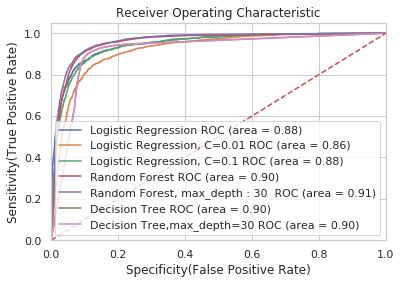

In [143]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(),
    },
    {
        'label': 'Logistic Regression, C=0.01',
        'model':  LogisticRegression(penalty='l2', C=0.01, random_state=0)
    },
    {
        'label': 'Logistic Regression, C=0.1',
        'model':  LogisticRegression(penalty='l2', C=0.1, random_state=0)
    },
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(),
    },
     {
        'label': 'Random Forest, max_depth : 30 ',
        'model': RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0),                            
    },
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(),
    },
    {
        'label': 'Decision Tree,max_depth=30',
        'model': DecisionTreeClassifier(max_depth=30,
                 max_features=10, min_samples_leaf=1,
                 min_samples_split=2, 
                 random_state=0),
    }
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred_lr= model.predict(X_test)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    auc = metrics.roc_auc_score(y_test, model.predict(X_test))

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [144]:
winner_model=RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
winner_model.fit(X_train, y_train)
Test_Data=Test_dt[opt_Et_selected]

In [145]:
prediction=pd.DataFrame(winner_model.predict(Test_Data),columns=['Zielvariable'])
proba=pd.DataFrame(list(winner_model.predict_proba(Test_Data)),columns=['zero','one'])
print(proba.head())

       zero       one
0  0.540220  0.459780
1  1.000000  0.000000
2  0.795556  0.204444
3  1.000000  0.000000
4  0.990000  0.010000


In [146]:
test_Id=test_data['Stammnummer']
predicted=proba['one']

my_submission = pd.DataFrame({'ID': test_Id, 'Expected': predicted})

my_submission.to_csv('submission.csv', index=False)
result=pd.read_csv('submission.csv')
print(result.head(30))

           ID  Expected
0   432176974  0.459780
1   432157692  0.000000
2   432170850  0.204444
3   432151613  0.000000
4   432167744  0.010000
5   432171512  0.248970
6   432164841  0.000000
7   432143118  0.000000
8   432162895  0.000000
9   432160756  0.000000
10  432162466  0.299026
11  432159354  0.000000
12  432184941  0.460000
13  432156905  0.000000
14  432184799  0.956107
15  432144081  0.000000
16  432181997  0.560000
17  432186531  0.210000
18  432154240  0.000000
19  432160530  0.000000
20  432144964  0.000000
21  432187104  0.858333
22  432161011  0.000000
23  432161962  0.180536
24  432160144  0.657000
25  432173536  0.337282
26  432184955  0.015000
27  432162766  0.000000
28  432181622  0.005020
29  432156978  0.015139
